# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
     \ 189.6MB 653kB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-ny1m1iph/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Load dataset

In [0]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Preliminary data analytics

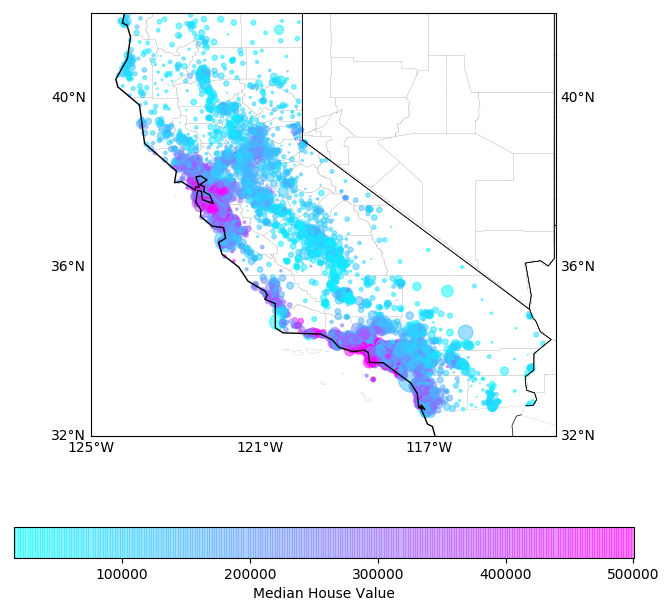

In [0]:
fig = plt.figure(figsize=(8, 8), dpi=100)

lat_min = np.round(df.Latitude.min()-0.2)
lat_max = np.round(df.Latitude.max()+0.2)
lon_min = np.round(df.Longitude.min()-0.2)
lon_max = np.round(df.Longitude.max()+0.2)

m = Basemap(projection='cyl',
            resolution='l', 
            llcrnrlat=lat_min,
            urcrnrlat=lat_max,
            llcrnrlon=lon_min,
            urcrnrlon=lon_max)

m.drawcoastlines(color='black')
m.drawcounties(color='gray')
m.drawstates(color='black')


m.drawparallels(np.arange(lat_min, lat_max, 4),
                labels=[1, 1, 0, 1],
                dashes=[6,900],
                color='w')

m.drawmeridians(np.arange(lon_min, lon_max, 4),
                labels=[1, 1, 0, 1],
                dashes=[6,900],
                color='w')

plt.scatter(df.Longitude, 
            df.Latitude, 
            s=df.Population/100,
            label="Population",
            c=df.target, 
            cmap=plt.get_cmap("cool"),
            alpha=.5)

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Median House Value')

plt.show()

In [0]:
df.corr()['target'].sort_values(ascending=False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

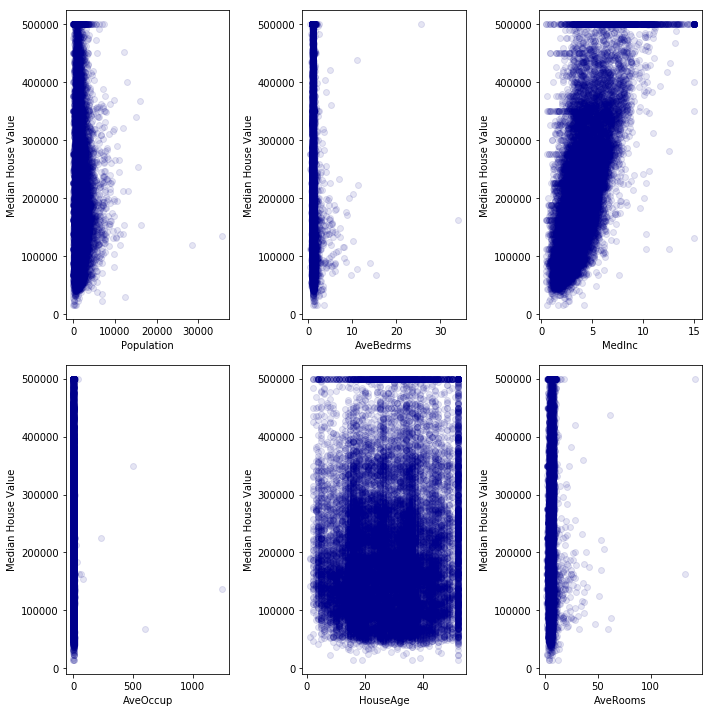

In [0]:
fig = plt.figure(figsize=(10,10))
for i, var in enumerate(set(df) - {'Latitude', 'Longitude', 'target'}):
    ax = fig.add_subplot(2,3,i+1)
    plt.scatter(df[var], df['target'], alpha=0.1, c='darkblue')
    plt.xlabel(var)
    plt.ylabel('Median House Value')
    # uncomment for logarithmic x-axis:
    # ax.set_xscale('log')
fig.tight_layout()

## Univariate Linear Regression


We observe that the highest correlation exists between the target variable and `MedInc`. Therefore, we'll use this variable to create a univariate regression model. **Ideally, we should have split the df into train/test before the exploratory data analytics.**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['MedInc'].values.reshape(-1, 1),
    df['target'],
    test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression

uniLR = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pred = uniLR.predict(X_test)

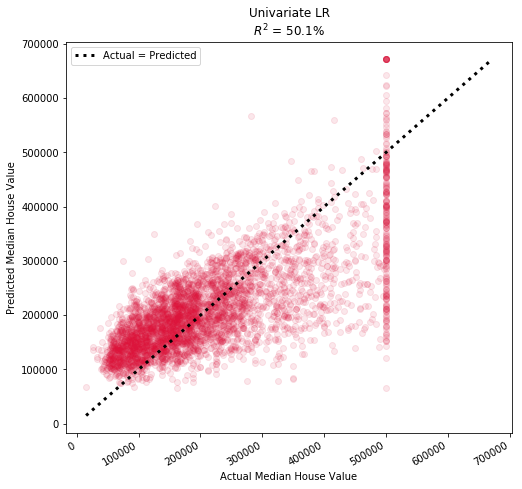

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

## Multivariate Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1).values,
    df['target'],
    test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression

multiLR = LinearRegression(n_jobs=-1, normalize=False).fit(X_train, y_train)
y_pred = multiLR.predict(X_test)

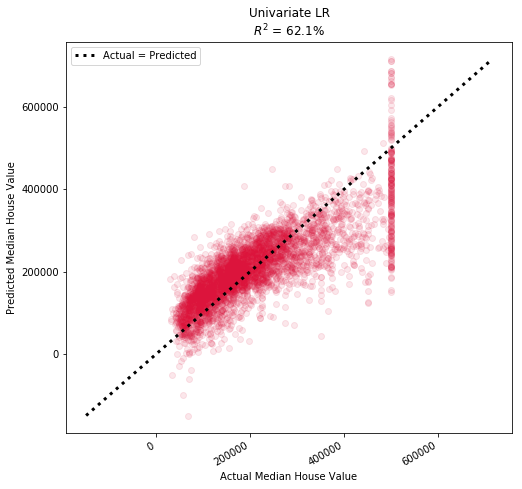

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

## Multivariate DNN Regression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    df[df['target']<500000].drop(['target'], axis=1).values,
    df[df['target']<500000]['target'],
    test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.2)

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/100
 - 3s - loss: 46694728726.3140 - mean_absolute_percentage_error: 99.9804 - val_loss: 45842997800.3868 - val_mean_absolute_percentage_error: 99.9365
Epoch 2/100
 - 1s - loss: 46583868147.4178 - mean_absolute_percentage_error: 99.8196 - val_loss: 45644392109.2723 - val_mean_absolute_percentage_error: 99.6477
Epoch 3/100
 - 1s - loss: 46253493188.5503 - mean_absolute_percentage_error: 99.3520 - val_loss: 45164356678.3511 - val_mean_absolute_percentage_error: 98.9643
Epoch 4/100
 - 1s - loss: 45579647206.9578 - mean_absolute_percentage_error: 98.4043 - val_loss: 44282354263.2875 - val_mean_absolute_percentage_error: 97.7141
Epoch 5/100
 - 1s - loss: 44440109463.8409 - mean_absolute_percentage_error: 96.8101 - val_loss: 42889700411.9288 - val_mean_absolute_percentage_error: 95.7354
Epoch 6/100
 - 1s - loss: 42745927837.3380 - mean_absolute_percentage_error: 94.4050 - val_loss: 40903622259.9491 - val_mean_absolute_percentage_error:

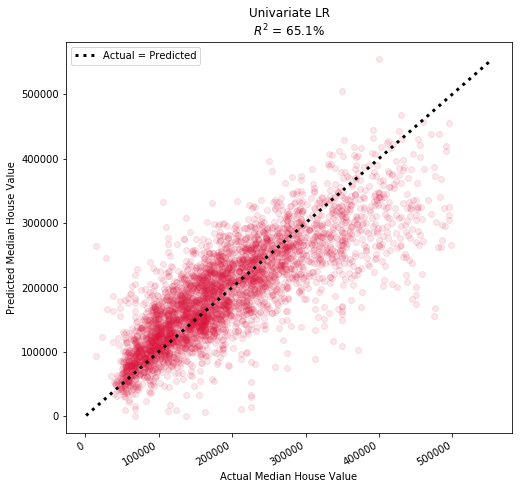

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 2s - loss: 46629845431.4388 - mean_absolute_percentage_error: 99.8780 - val_loss: 45318645285.7812 - val_mean_absolute_percentage_error: 99.1131
Epoch 2/2000
 - 0s - loss: 40284496546.3057 - mean_absolute_percentage_error: 89.7153 - val_loss: 26044858133.4962 - val_mean_absolute_percentage_error: 65.6884
Epoch 3/2000
 - 0s - loss: 12593521744.1349 - mean_absolute_percentage_error: 42.9266 - val_loss: 6692089316.6412 - val_mean_absolute_percentage_error: 38.5636
Epoch 4/2000
 - 0s - loss: 6178484595.6825 - mean_absolute_percentage_error: 37.4061 - val_loss: 5965588026.6260 - val_mean_absolute_percentage_error: 36.1093
Epoch 5/2000
 - 0s - loss: 5606484066.3770 - mean_absolute_percentage_error: 35.4314 - val_loss: 5532096325.6997 - val_mean_absolute_percentage_error: 34.6074
Epoch 6/2000
 - 0s - loss: 5176658740.9753 - mean_absolute_percentage_error: 33.8673 - val_loss: 5160165300.4377 - val_mean_absolute_percentage_error: 

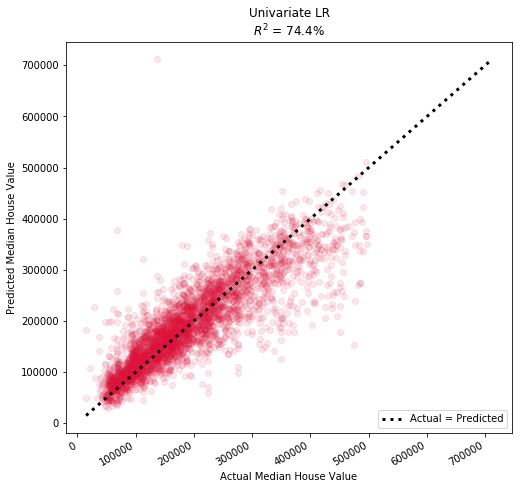

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(24, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))

model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)



Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 4s - loss: 32193845782.3954 - mean_absolute_percentage_error: 79.0891 - val_loss: 8811908660.1120 - val_mean_absolute_percentage_error: 45.3390
Epoch 2/2000
 - 1s - loss: 6468262314.0016 - mean_absolute_percentage_error: 36.9941 - val_loss: 5900886900.6005 - val_mean_absolute_percentage_error: 36.0206
Epoch 3/2000
 - 1s - loss: 5063361980.2437 - mean_absolute_percentage_error: 32.5551 - val_loss: 4907128402.0763 - val_mean_absolute_percentage_error: 32.8997
Epoch 4/2000
 - 1s - loss: 4318655852.9435 - mean_absolute_percentage_error: 29.7774 - val_loss: 4719684717.4351 - val_mean_absolute_percentage_error: 25.5643
Epoch 5/2000
 - 1s - loss: 3819784576.9569 - mean_absolute_percentage_error: 27.4841 - val_loss: 3916098994.4835 - val_mean_absolute_percentage_error: 24.6384
Epoch 6/2000
 - 1s - loss: 3696724060.3913 - mean_absolute_percentage_error: 26.7971 - val_loss: 4178305099.5623 - val_mean_absolute_percentage_error: 32.0

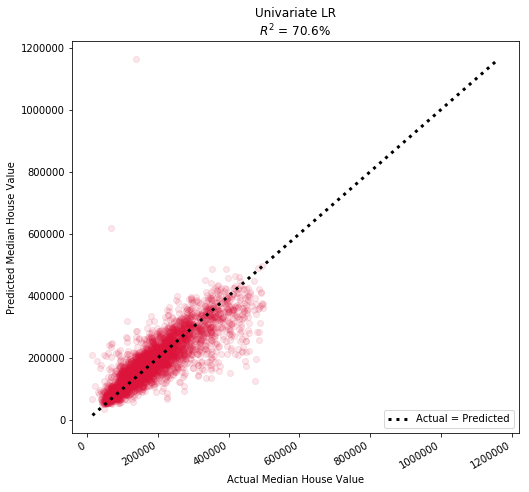

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

# LR from scratch

In [0]:
def predictPrice(x,W):
    return np.dot(x,W)

In [0]:
def calculateCost(x,W,Y):
    prediction = predictPrice(x,W)
    return ((prediction - Y)**2).mean()/2

In [0]:
def abline(x,W,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,W)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [0]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    w0 = []
    w1 = []
    costs = []
    predictor = df["rm"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["medv"]
    W = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,W)
        t0 = W[0] - alpha *(pred - Y).mean()
        t1 = W[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        W = np.array([t0,t1])
        J = calculateCost(x,W,Y)
        w0.append(t0)
        w1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {W}")
            abline(x,W,Y)
    print(f'theta0 = {len(w0)}\ntheta1 = {len(w1)}\nCosts = {len(costs)}')

In [0]:
gradientDescentLinearRegression()

KeyError: ignored